In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore, entropy
from tqdm import tqdm
from collections import Counter
import networkx as nx
from scipy.spatial.distance import jensenshannon

lda_path = '/home/rb/Documents/Data/models/lda/postwar-v3/'

In [2]:
metadata = pd.read_csv('/home/rb/Documents/Data/metadata/metadata-full.tsv',sep='\t',usecols=['topic_id','session_type'])
plenary_filter = dict(zip(metadata.topic_id,metadata.session_type))

In [3]:
keys =  pd.read_csv(lda_path + 'keys.tsv', header=None, sep='\t')
keys = dict(zip(keys[0],keys[2]))

In [4]:
dat = pd.read_csv(lda_path + 'data.tsv',header=0,sep='\t',usecols=['topic_id','member-ref','party-ref','role','date','speaker','lemm_cleaned'],parse_dates=['date'])
dists = pd.read_csv(lda_path + 'dist.tsv', header=None, sep='\t').iloc[:, 2:].rename(columns=lambda x: x - 2)

In [ ]:
dists.index = dat.date.dt.to_period('Q').dt.to_timestamp()

## Herfindahl Index

In [ ]:
herf = dists.apply(lambda row: (row ** 2).sum(),axis=1)
herf.groupby(herf.index).mean().plot()

## Entropy

In [15]:
edf = pd.DataFrame(dists.groupby(dists.index).apply(entropy).to_dict()).T
fdf = dists.groupby(dists.index).mean()

<AxesSubplot: xlabel='date'>

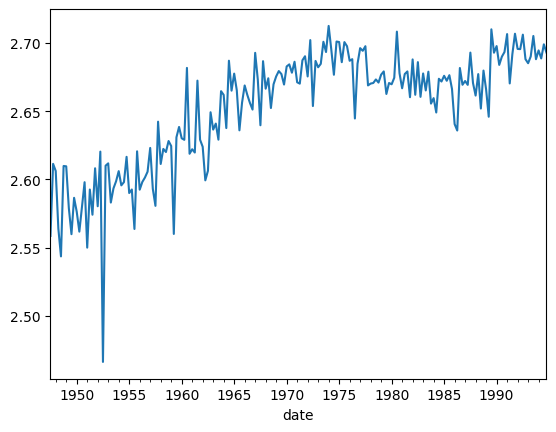

In [54]:
dists.apply(entropy,axis=1).groupby(dists.index).mean().plot()

Text(0.5, 1.0, 'loon arbeider regering prijs loonpolitiek loo')

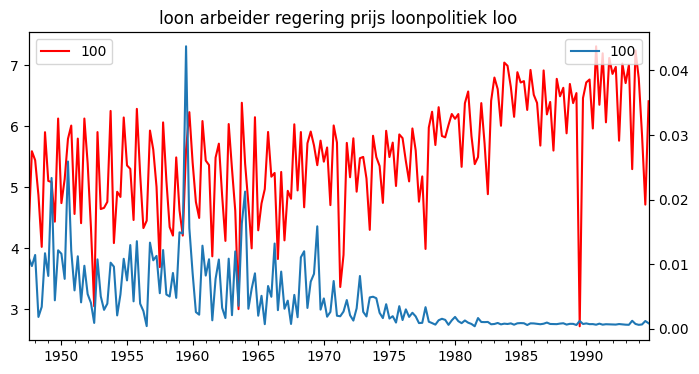

In [29]:
t = 100
f,a = plt.subplots(figsize=(8,4))
aa = a.twinx()
edf.plot(y=t,ax=a,color='red')
fdf.plot(y=t,ax=aa)
a.set_title(keys[t][:45])